<div align="center">

## **Section 1: Title**

</div>

<div align="center">

## **Section 2: Introduction**

</div>

Understanding player engagement is important for planning and managing a game research project. In this study, we investigate which types of players are more likely to subscribe to a game-related newsletter. Subscribing to a newsletter may show a player’s deeper interest in the game and their willingness to stay involved in future updates or events. Knowing which player characteristics and behaviors are linked to subscriptions can help the research team target recruitment efforts and allocate resources more effectively.

Our research question is: **`What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?`**

To answer this question, we analyze a dataset called `players.csv`, which was collected by a research group in the Computer Science department at the University of British Columbia. The dataset contains information about each player, such as their age, gender, experience level, total hours played, and whether or not they subscribed to the newsletter. By exploring these features, we aim to identify what makes a player more likely to subscribe and how subscriber and non-subscriber groups differ. This information can help support better decision-making in the game research project

players.csv, a list of all unique players, includes 196 observations and 7 different variables: 
| Variables  |       type      |   meaning
| ---------- | --------------- | ----------------------------------------------------------------------------- |
|Experience  |character vector | distinguish players'experience into 5 levels                                  |
|subscribe   |logical          | true if the player has subscribed to a game-related newsletter, false if the player did not  subscribe |
|hashedEmail |character        | email address                                                                 |
|played_hours|double           | hours players spent on playing game                                           |       
|name        |character        | name of each player                                                           |
|gender      |character        | gender of each player                                                         |
|Age         |double           | age of each player    

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("patchwork")
library(patchwork)
options(repr.matrix.max.rows = 6) # Makes datasets show up to only 6 observations

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

1.loads data 
2.wrangles and cleans the data to the format necessary for the planned analysis
3.performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
4.creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5.performs the data analysis
6.creates a visualization of the analysis 

### **1)Load Data**

In [4]:
#Read the two datasets
player_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### **2)wrangles and cleans the data**

In [39]:
#Check for Duplicate Records for player data
nrow(players) - nrow(distinct(players))

#Check if there is NA value in Variables for session data
colSums(is.na(players))

#Remove NA value
players <- players|>
  filter(!is.na(Age))

#Check again
colSums(is.na(players))

#Check for Duplicate Records for session data
nrow(sessions) - nrow(distinct(sessions))

players <- players |>
    mutate(gender = as_factor(gender),
          subscribe = as_factor(subscribe),
          experience = as_factor(subscribe))

[1] 0

experience      subscribe    hashedEmail   played_hours           name 
             0              0              0              0              0 
        gender            Age gender_grouped 
             0              0              0

experience      subscribe    hashedEmail   played_hours           name 
             0              0              0              0              0 
        gender            Age gender_grouped 
             0              0              0

[1] 0

### **3)Summary of players dataset**

### **PLAYERS DATA (`players.csv`)**

| Player.csv       | Value |
|-----------------|-------|
| Number of Observations | 196 |
| Number of Variables    | 7   |


| **Variable Name**  | **Data Type**  | **Description**  | **Mean (if applicable)**  | **Standard Deviation** | **Min** | **Max** |
|-------------------|--------------|-----------------|----------------------|--------------------|------|------|
| **experience**    | Character    | 4 types of Player’s experience level: Beginner, Regular, Veteran, Pro | / | / | / | / |
| **subscribe**     | Logical (TRUE/FALSE) | Whether the player subscribed to the game newsletter | / | / | / | / |
| **hashedEmail**   | Character    | Anonymized player email | / | / | / | / |
| **played_hours(hr)**  | Numeric (dbl) | Total hours the player has spent in the game | 5.85 | 28.50 | 0 | 223 |
| **name**         | Character    | Player’s in-game name | / | / | / | / |
| **gender**       | Character    | Player’s gender (Male/Female) | / | / | / | / |
| **Age(year)**          | Integer      | Age of Player | 20.52 | 6.17 | 8 | 50 |

In [6]:
print(players,n=5)

# A tibble: 194 × 7
  experience subscribe hashedEmail               played_hours name  gender   Age
  <chr>      <fct>     <chr>                            <dbl> <chr> <fct>  <dbl>
1 Pro        TRUE      f6daba428a5e19a3d4757485…         30.3 Morg… Male       9
2 Veteran    TRUE      f3c813577c458ba0dfef8099…          3.8 Chri… Male      17
3 Veteran    FALSE     b674dd7ee0d24096d1c01961…          0   Blake Male      17
4 Amateur    TRUE      23fe711e0e3b77f1da7aa221…          0.7 Flora Female    21
5 Regular    TRUE      7dc01f10bf20671ecfccdac2…          0.1 Kylie Male      21
# ℹ 189 more rows


### Visualizations

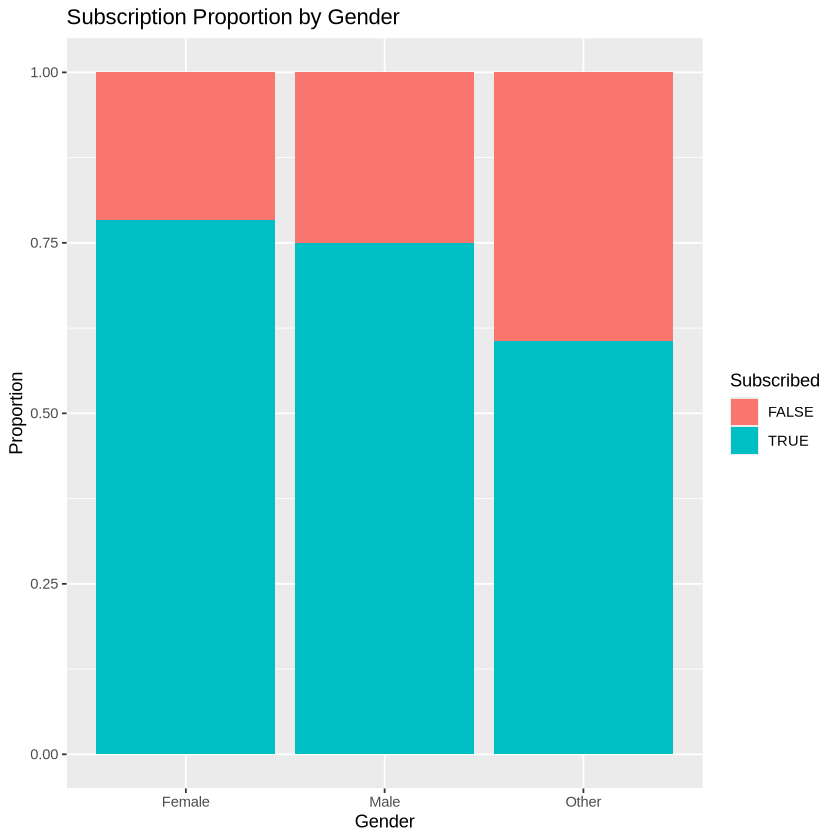

In [7]:
# subscription rate vs Gender
players <- players |> 
  mutate(gender_grouped = case_when(
    str_to_lower(gender) %in% c("male", "m") ~ "Male",
    str_to_lower(gender) %in% c("female", "f") ~ "Female",
    !is.na(gender) ~ "Other",
    TRUE ~ NA_character_))

gender_chart<-ggplot(players, aes(x = gender_grouped, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Subscription Proportion by Gender",
    x = "Gender",
    y = "Proportion",
    fill = "Subscribed")

gender_chart


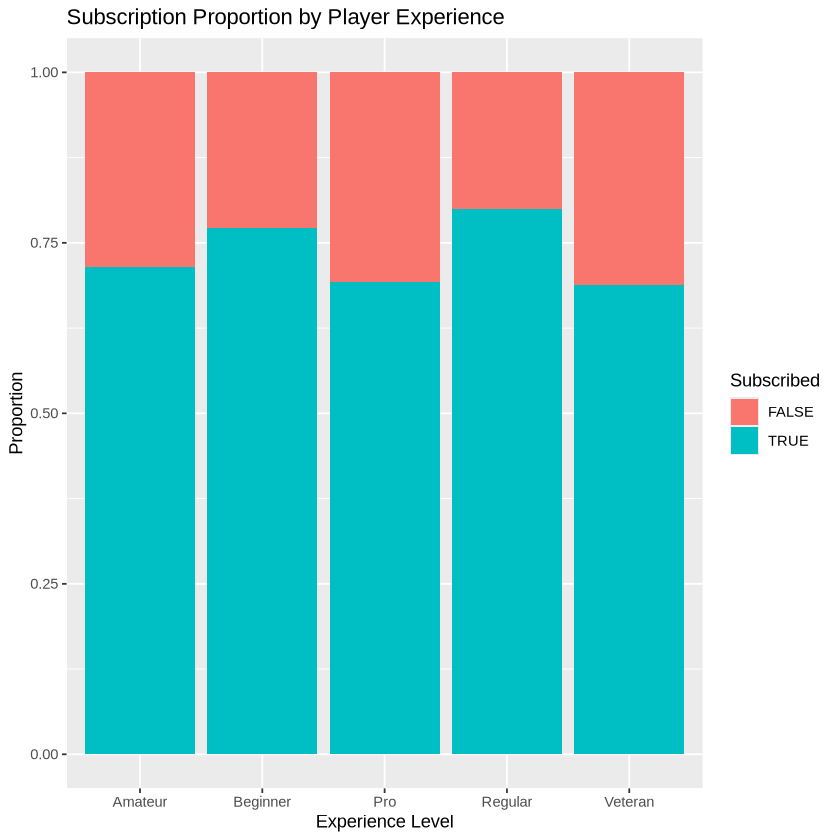

In [8]:
# subscription rate vs Experience level
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(
    title = "Subscription Proportion by Player Experience",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed")


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


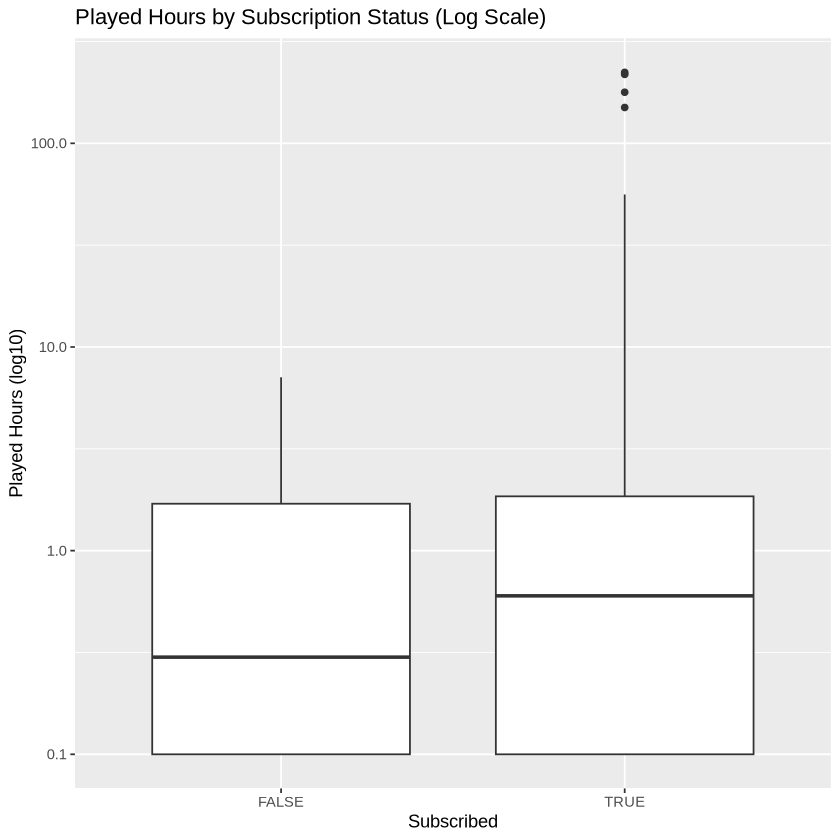

In [9]:
Box_plot_played_hours <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  scale_y_log10() +
  labs(y = "Played Hours (log10)", 
       x = "Subscribed",
       title = "Played Hours by Subscription Status (Log Scale)")

Box_plot_played_hours 


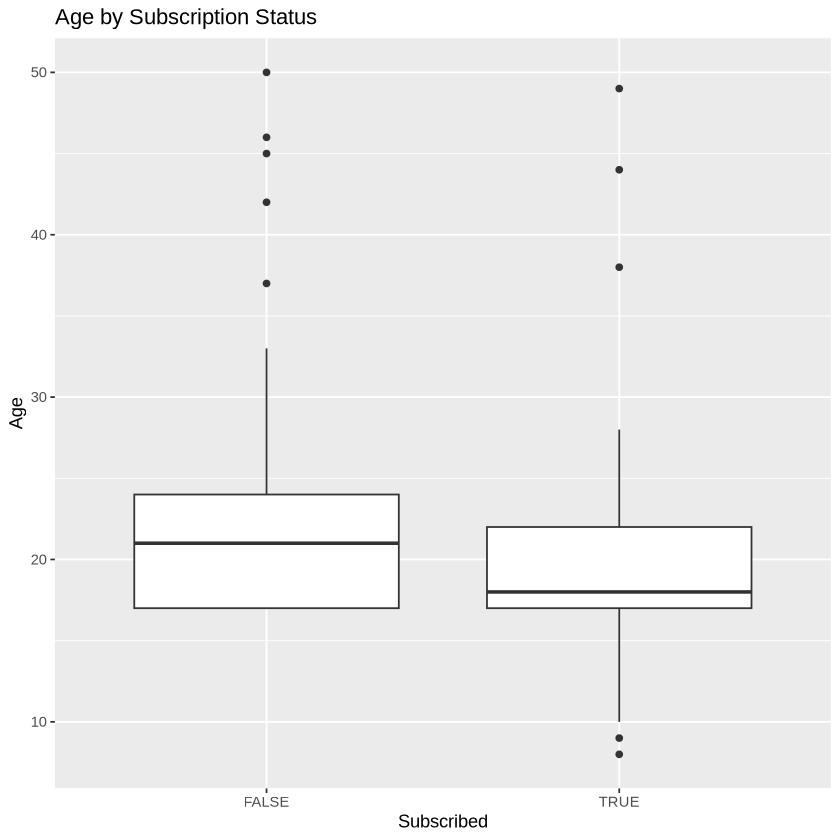

In [10]:
Box_plot_age <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_boxplot() +
  labs(y = "Age", 
       x = "Subscribed",
       title = "Age by Subscription Status")

Box_plot_age

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


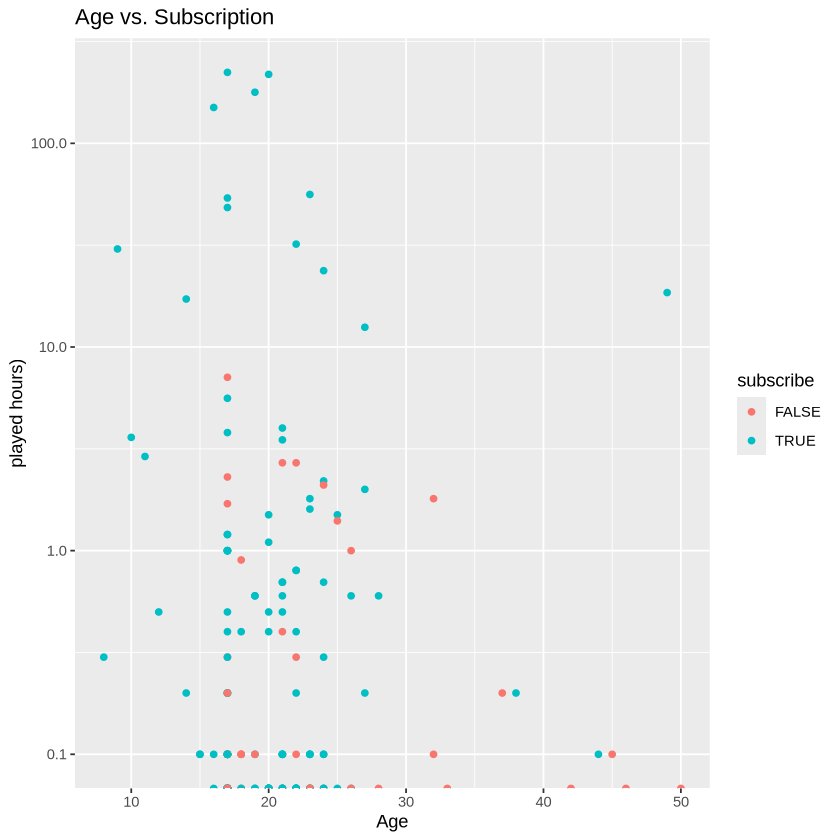

In [11]:
#age vs played_hours
distribution<-ggplot(players,
       aes(x = Age, y = played_hours,color=subscribe	)) +
  geom_point() +
  scale_y_log10()+#log
 labs(
    title = "Age vs. Subscription",
    x = "Age",
    y = "played hours)")
distribution


### Data Analysis

In [55]:
set.seed(1)

# Splitting the data into a training set and a testing set
players_split <- initial_split(players, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)

# Making a recipe and specification
players_recipe <- recipe(subscribe ~ Age + played_hours + gender, data = players_train) |>
   step_scale(Age, played_hours) |>
   step_center(Age, played_hours)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")
players_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5112808,5,0.04341103,Preprocessor1_Model01
1,roc_auc,binary,0.4793831,5,0.04823281,Preprocessor1_Model01
2,accuracy,binary,0.5041708,5,0.02426336,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.5723408,5,0.044859084,Preprocessor1_Model29
30,accuracy,binary,0.7242529,5,0.009854939,Preprocessor1_Model30
30,roc_auc,binary,0.5755257,5,0.060510740,Preprocessor1_Model30


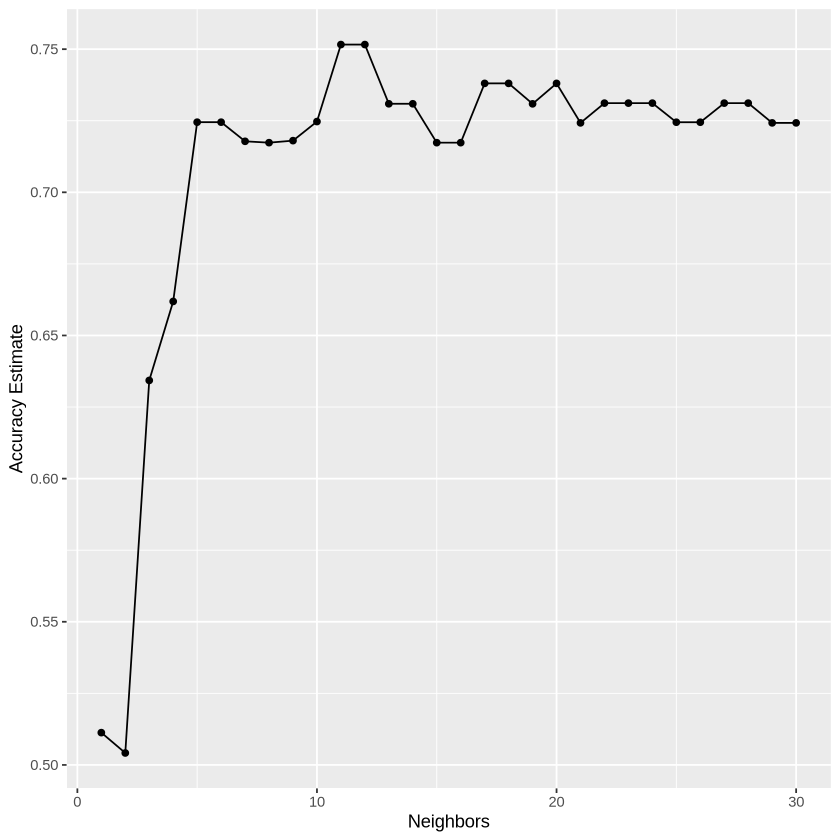

In [56]:
set.seed(1)

# Performing cross-validation on the training data with 5  folds
vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

# Choosing the k values for which we want to see the accuracy
# We chose 1 to 15 because we thought that this could be a big enough variety to observe the best k, if one exists
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# Extracting the metrics from the workflow
players_metrics <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()
players_metrics

# Getting the accuracies
accuracy <- players_metrics |>
    filter(.metric == "accuracy")

# Plotting the k values for each number of neighbors from 1 to 15
cross_val_plot <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate")

cross_val_plot

In [59]:
set.seed(1)

# Making sure that the maximum that we see on the graph above is the same as the actual maximum
best_k <- accuracy |>
    slice_max(mean) |>
    select(neighbors) |>
    pull()
best_k

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = min(best_k)) |>
    set_engine("kknn") |>
    set_mode("classification")

[1] 11 12

<div align="center">

## **Section 3: Methods & Results**

</div>

<div align="center">

## **Section 4: Discussion:**

</div>

<div align="center">

## **Section 5: References:**

</div>